In [1]:
from google.colab import files
uploaded = files.upload()


Saving blood.csv to blood (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("blood.csv")
df.head()


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.describe()


,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


In [6]:
df.isnull().sum()


,0
Recency,0
Frequency,0
Monetary,0
Time,0
Class,0


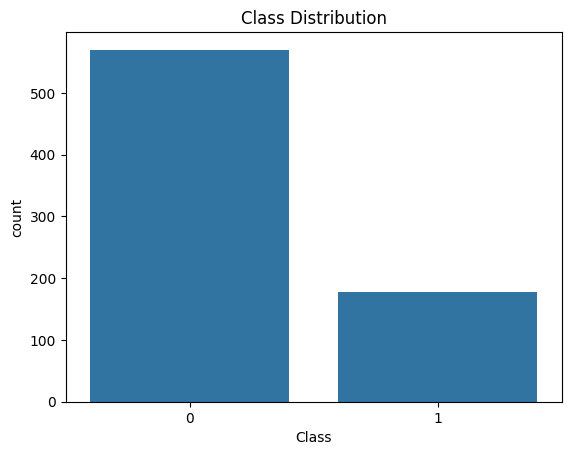

In [8]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution")
plt.show()

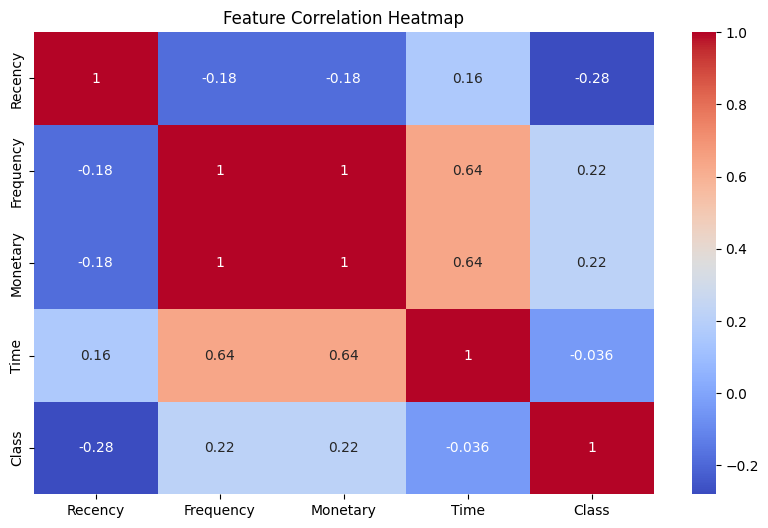

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.72


In [17]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[99 14]
 [28  9]]


In [18]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150



In [19]:
def healthcare_recommendation(pred):
    if pred == 0:
        return "Healthy – Maintain current lifestyle"
    elif pred == 1:
        return "Regular health check-up recommended"
    else:
        return "Immediate medical consultation required"


In [22]:
new_patient_data = pd.DataFrame(new_patient, columns=['Recency', 'Frequency', 'Monetary', 'Time'])
new_patient_scaled = scaler.transform(new_patient_data)

prediction = model.predict(new_patient_scaled)
print("Prediction:", prediction[0])
print("Recommendation:", healthcare_recommendation(prediction[0]))

Prediction: 0
Recommendation: Healthy – Maintain current lifestyle


In [23]:
print("""
This project successfully predicts health risk using blood parameters
and provides personalized healthcare recommendations using Machine Learning.
""")



This project successfully predicts health risk using blood parameters
and provides personalized healthcare recommendations using Machine Learning.

